In [1]:
palabra1 = 'ST'
palabra2 = 'DS'
ocurrencias1 = []
ocurrencias2 = []
file_DS = open('151020191311_DS.txt', 'w+') #Nombra tu nuevo archivo DS.

file_ST = open('151020191311_ST.txt', 'w+') # Nombra tu nuevo archivo ST.
with open('151020191311.txt') as lineas: # Abre archivo de Escaramujo
    flag=False
    for linea in lineas:
            if flag: 
                ocurrencias2.append(linea)
                flag=False 
            if palabra1 in linea:
                ocurrencias1.append(linea)
                flag=True 
 
       
for i, j in enumerate (ocurrencias1):
    #print(i, j)
    file_ST.write(str(j))

file_ST.close() 

for i, k in enumerate (ocurrencias2):
    #print i, k
    file_DS.write(str(k))

file_DS.close()

In [19]:
import pandas as pd
import pytz, datetime
import pytz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dec = open('151020191311_deci.txt','w') # Nombra tu nuevo archivo en decimal.
ST = '151020191311_DS.txt' # Tu archivo DS del programa de 'Busqueda_ST_DS'.
coincidencias = np.loadtxt(ST,delimiter= ' ',skiprows=2,usecols=[5],dtype=bytes).astype(str)

for i, j in enumerate (coincidencias):  
    k= int(j,16)
    #print i, k
    dec.write(str(k))
    dec.write("\n")
    
dec.close() 


In [4]:

dia_hora_coincidencias = open('151020191311_final_dia.csv','w') # Nombra nuevo archivo final.
noche_hora_coincidencias = open('151020191311_final_noche.csv','w')

dec = '151020191311_deci.txt' # Llama archivo creado en 'Hexadecimal_Decimal'.
coincidencias = np.loadtxt(dec,delimiter= ' ',usecols=[0],dtype=bytes).astype(str)

ST = '151020191311_ST.txt' # Llama archivo creado en 'Busqueda_ST_DS'.
hora = np.loadtxt(ST,delimiter= ' ',skiprows=2,usecols=[5],dtype=bytes).astype(str)
fecha = np.loadtxt(ST,delimiter= ' ',skiprows=2,usecols=[6],dtype=bytes).astype(str)

Titulo= 'Fecha,Hora,Coincidencias\n'
#print Titulo
dia_hora_coincidencias.write (str(Titulo))
noche_hora_coincidencias.write (str(Titulo))
print(hora)
for i in range(len(hora)):
    test = int(hora[i])
     #print(test)
    if 63500<test<192417 : # Fija intervalo de horas para el día
        data = fecha[i] + "," + hora[i] + "," + coincidencias[i] 
        #print(data)
        dia_hora_coincidencias.write(str(data))
        dia_hora_coincidencias.write("\n") 
    else:
        data2 = fecha[i] + "," + hora[i] + "," + coincidencias[i] 
        #print data2
        noche_hora_coincidencias.write(str(data2))
        noche_hora_coincidencias.write("\n") 
        
dia_hora_coincidencias.close()
noche_hora_coincidencias.close()
print(fecha)


['000000' '000000' '000000' ... '000000' '000000' '000000']
['000000' '000000' '000000' ... '000000' '000000' '000000']


In [5]:

datos= pd.read_csv('151020191311_final_dia.csv')
datos2= pd.read_csv('151020191311_final_noche.csv')
df=pd.DataFrame(datos)
df2=pd.DataFrame(datos2)



In [6]:
df.head()

,Fecha,Hora,Coincidencias


In [7]:
df2.head()

,Fecha,Hora,Coincidencias
0,0,0,75
1,0,0,54
2,0,0,92
3,0,0,89
4,0,0,72


In [8]:
df2['Coincidencias'].describe()

count    2715.000000
mean       80.335543
std         9.096010
min        54.000000
25%        74.000000
50%        80.000000
75%        86.000000
max       137.000000
Name: Coincidencias, dtype: float64

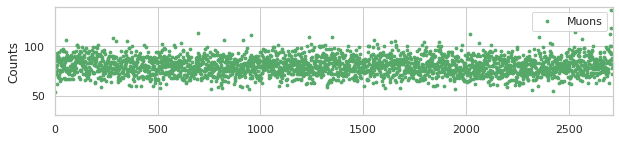

<Figure size 432x288 with 0 Axes>

In [16]:

fig, axes = plt.subplots(1,1, figsize=(10,2), sharex=True)
axes =df2['Coincidencias'].plot(marker='.',markersize=5.5, ylim=(30,140),linestyle='None',legend=True,  label='Muons',alpha=1,color='g', subplots=True)

ax = plt.gca()
ax.set_ylabel('Counts')
plt.show()
plt.savefig('EscaramujoMuonesTimeseries151020191311.png')

In [12]:
myarray = np.asarray(coincidencias)

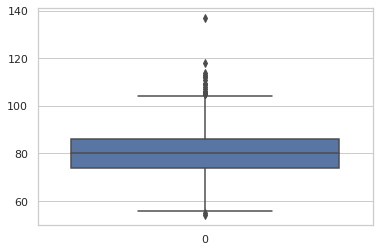

In [17]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(data=myarray)
plt.savefig("Escaramujocoincidencias.png", bbox_inches='tight')

In [33]:
counts = pd.read_csv('muonrate.txt',delimiter=";",skiprows=1, names=['count','eff','utc'],lineterminator='\n')
counts['datetime']=pd.to_datetime(counts.utc, unit='s',utc=True)
counts.set_index(['datetime'],drop=True, inplace=True)


In [34]:
counts.head()

,count,eff,utc
datetime,,,
2019-10-14 19:22:40+00:00,3.58528,1.0,1571080960
2019-10-14 20:22:38+00:00,3.61500,1.0,1571084558
2019-10-14 21:22:36+00:00,3.61417,1.0,1571088156
2019-10-14 22:22:34+00:00,3.56417,1.0,1571091754
2019-10-14 23:22:32+00:00,3.60222,1.0,1571095352


In [35]:
flag=np.logical_and(counts.index>"2019-10-14",counts.index<"2019-10-28 ")

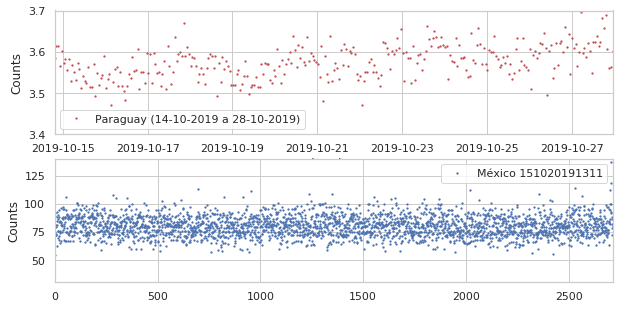

In [67]:
fig, axes = plt.subplots(2,1, figsize=(10,5), sharex=True)
plt.subplot(211)

axes =counts['count'][flag].plot(marker='.',markersize=2.5, ylim=(3.4,3.7),linestyle='None',legend=True,  label='Paraguay (14-10-2019 a 28-10-2019)',alpha=1,color='r', subplots=True)
ax = plt.gca()
ax.set_ylabel('Counts')
plt.subplot(212)
axes =df2['Coincidencias'].plot(marker='.',markersize=2.5, ylim=(30,140),linestyle='None',legend=True,  label='México 151020191311',alpha=1,color='b', subplots=True)
ax = plt.gca()
ax.set_ylabel('Counts')
plt.savefig('EscaramujovsParaguay.png')

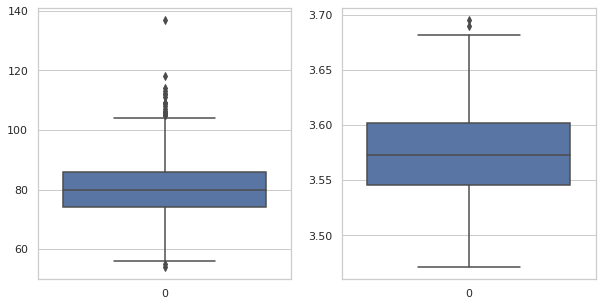

In [64]:
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(10,5), sharex=True)
plt.subplot(121)
sns.set(style="whitegrid")
ax = sns.boxplot(data=myarray)
plt.subplot(122)
sns.set(style="whitegrid")
ax = sns.boxplot(data=counts['count'][flag].values)
plt.savefig("boxplot.png", bbox_inches='tight')